# **APA - Correlation Analysis**
# DATA 3300


## Name: Oliver Heady

## Exercise

## Q1

**First, load the required libraries then import the dataset. Produce a heading of the data and then consider which variables need to be removed prior to running a correlation analysis. Subset the dataframe to include only those variables that can be included, then generate histograms for each of those variables. Do any require additional preprocessing before running the analysis?**

**List each variable and how each one should be either omitted or modified, and state why the modification is needed.**


In [27]:
# load pandas, matplotlib.pyplot, and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats #this library will be used to transform variables

In [28]:
# import dataset
df = pd.read_csv("/content/faculty.csv")
# preview dataset (heading)
df.head()

,facid,n1,n2,n3,n4,m1,m2,m3,m4,s1,s2,s3,gender,tenure-track,courserate,gpa,lrnoutcome
0,1,6,6,5,5,2,2,4,2,2,2,2,female,y,4.654,2.865,5.5
1,2,4,5,3,3,4,4,3,4,2,3,2,female,n,3.598,2.399,5.5
2,3,4,4,2,3,3,3,3,2,1,2,2,female,y,3.355,2.269,3.0
3,4,4,4,4,4,2,2,2,2,2,3,3,male,n,4.234,2.863,4.2
4,5,6,7,4,5,3,3,3,2,2,1,2,male,y,4.972,3.314,5.2


In [29]:
# select only columns that can be included in a correlation analysis OR drop out columns that cannot be included
df_T = df.drop(['facid', 'gender', 'tenure-track'], axis=1) #drop unwanted columns


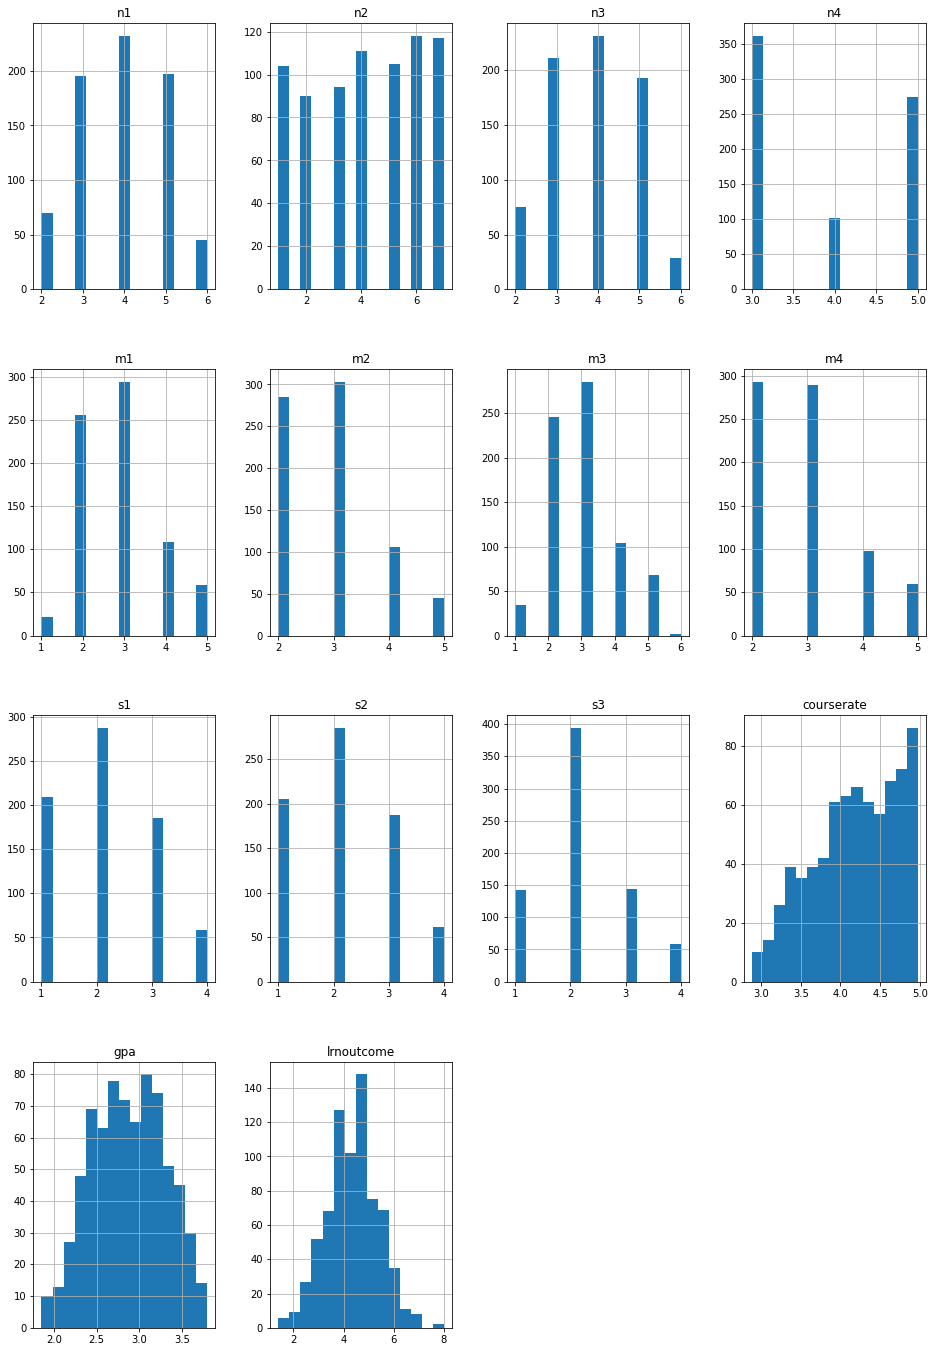

In [30]:
# generate histograms on remaining variables/columns, hint: how might you need to change the layout values?
df_T.hist(layout=(4,4), figsize=(16,24), bins=15) #creates a 4x4 grid of histograms (up to 16 total) with bin size of 15
plt.show()

I omitted facid, gender, and tenure-track because they're the primary key/they're qualitative. The following data aren't currently normally distributed, so I'll need to perform dome more pre-processing to get them there: n2, n4, m2, m4, courserate.

# Q2

**Generate correlation matrix colormap table, making sure to include all necessary steps:**

## A 

**Transform skewed variables using a transformation, including `n4`, `courserate`, `m2`, and `m4`.**

**In the ICE you learned do log and square root transformations, but there are other kinds as well including:**
* Box-Cox: `df['n4_bc'] = stats.boxcox(df['n4'])[0]`
* Repiprocal:  `df['n4_bc'] = np.reciprocal(df['n4'])`
* Yeo-Johnson: `df['n4_bc'] = stats.yeojohnson(df['n4'])[0]`

**Experiment with which of these transformations does the best job of getting the distribution of each of these variables closest to normal by viewing the distribution of the transformed variables with histogram plots.**

**Are there any variables who's distribution cannot be made roughly normal? How could this impact the validity of the correlation analysis?**

In [31]:
# create new transformed variables for n4, courserate, m2, and m4
df_T['courserate_bc'] = stats.boxcox(df_T['courserate'])[0]

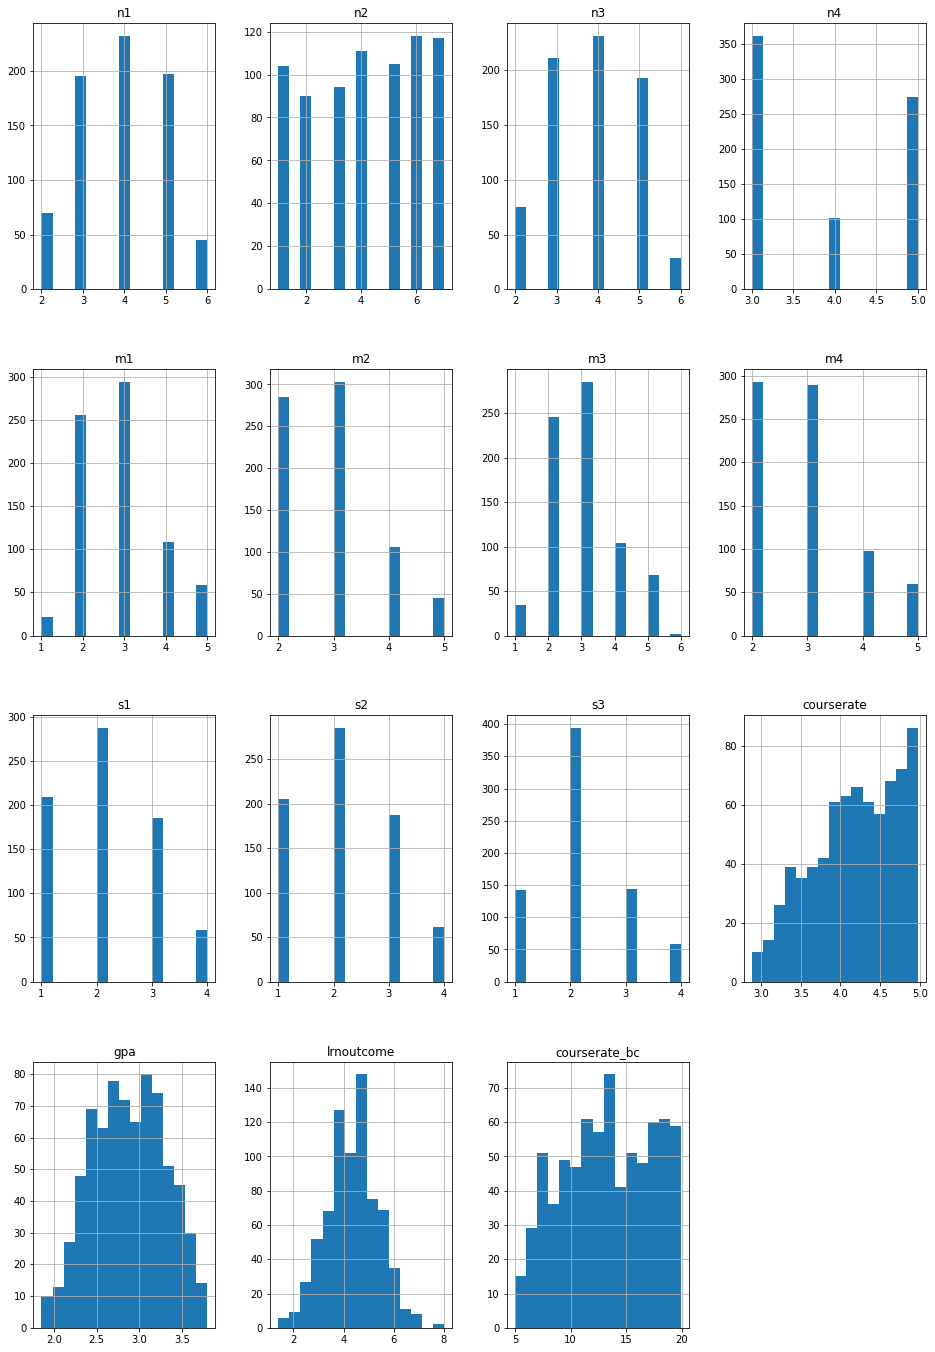

In [32]:
# view histograms of transformed variables (it's okay to include the other variables as well)
df_T.hist(layout=(4,4), figsize=(16,24), bins=15) #creates a 4x4 grid of histograms (up to 16 total) with bin size of 15
plt.show()

The only one whose transformation could be made more normal is the courserate, by using the box-cox method. After trying all the methods, n2, n4, m2, and m4 could not be made normal.



## B

**Create a new data object subset (e.g., call it df_T) that contains your new transformed variables, and the original normally distributed variables.**

**Then, run the correlation matrix and display it in a color mapped table.**


In [33]:
# create new data subset object that drops n4, courserate, m2, and m4
df_T = df_T.drop(['courserate'], axis = 1)
df_T.head()

,n1,n2,n3,n4,m1,m2,m3,m4,s1,s2,s3,gpa,lrnoutcome,courserate_bc
0,6,6,5,5,2,2,4,2,2,2,2,2.865,5.5,16.915312
1,4,5,3,3,4,4,3,4,2,3,2,2.399,5.5,8.852500
2,4,4,2,3,3,3,3,2,1,2,2,2.269,3.0,7.403236
3,4,4,4,4,2,2,2,2,2,3,3,2.863,4.2,13.353711
4,6,7,4,5,3,3,3,2,2,1,2,3.314,5.2,19.938154


In [34]:
# create correlation matrix
# create color map table (cool-warm to show positive and negative correlations)
cor_matrix2 = df_T.corr() #run correlation matrix
cor_matrix2.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1) #produce correlation matrix table with colormap

,n1,n2,n3,n4,m1,m2,m3,m4,s1,s2,s3,gpa,lrnoutcome,courserate_bc
n1,1.000000,-0.024491,0.652411,0.764106,-0.050889,-0.073633,-0.061133,-0.071739,0.157801,0.185213,0.226448,0.392515,-0.143819,0.462308
n2,-0.024491,1.000000,-0.022666,-0.026612,-0.033496,0.018317,-0.030409,0.016164,-0.040619,0.021016,-0.014501,-0.067521,0.034990,-0.041498
n3,0.652411,-0.022666,1.000000,0.772224,-0.086108,-0.115121,-0.126029,-0.114084,0.130478,0.200084,0.194603,0.378254,-0.175967,0.468600
n4,0.764106,-0.026612,0.772224,1.000000,-0.101783,-0.123994,-0.100788,-0.123729,0.201138,0.242066,0.256708,0.449786,-0.203650,0.505710
m1,-0.050889,-0.033496,-0.086108,-0.101783,1.000000,0.575015,0.490604,0.582808,0.009045,-0.045804,0.017578,-0.179730,0.071996,-0.102733
m2,-0.073633,0.018317,-0.115121,-0.123994,0.575015,1.000000,0.576828,0.668582,-0.001568,0.004675,0.007725,-0.194310,0.087184,-0.105001
m3,-0.061133,-0.030409,-0.126029,-0.100788,0.490604,0.576828,1.000000,0.570679,0.007947,-0.060918,-0.011655,-0.159613,0.065084,-0.089496
m4,-0.071739,0.016164,-0.114084,-0.123729,0.582808,0.668582,0.570679,1.000000,-0.031478,-0.014400,0.021903,-0.211932,0.071100,-0.123502
s1,0.157801,-0.040619,0.130478,0.201138,0.009045,-0.001568,0.007947,-0.031478,1.000000,0.404751,0.442554,0.076662,-0.060957,-0.131673
s2,0.185213,0.021016,0.200084,0.242066,-0.045804,0.004675,-0.060918,-0.014400,0.404751,1.000000,0.472500,0.110119,-0.135344,-0.087594


## C

**Based on your correlation analysis, what are the *three strongest positive* correlations? Next identify the *three strongest negative* correlations in the dataset. Provide both the item pairs as well as their correlation coefficient.**



**3 strongest positive**
* (n4, n1) 0.764
* (n4, n3) 0.772
* (m2, m4) 0.669

**3 strongest negative**
* (m4, gpa) -0.212
* (n4, lrnoutcome) -0.204
* (m2, gpa) -0.194

## D
**What is the *third* highest $R^2$ value for any variable pair in the analysis?
What does this $R^2$ value tell us about the relationship between the two variables?**



In [35]:
# calculate R^2 from r value
0.669 ** 2

0.44756100000000004

the r^2 value of 0.45 shows us that 45% of one variable can be predicted by the other.

## E
**What is convergent validity and when does it matter?**


convergent validity allows us to use correlating quantatative variables to give us a numeric version of an otherwise qualitative variable.

## F

**Assuming that an $r$ of 0.3 is required to demonstrate convergent validity, do the multiple items that make up each of the Narcissism (the *n* variables), Machiavellianism (the *m* variables), and Sociopathy (the *s* variables) measurements demonstrate convergent validity? Identify any attributes that do not converge adequately and report their r values.**




n2, with r values around -.02 for each of the following: n1, n3, n4.

# Q3

## A
**Create three new aggregate variabls by averaging the coverging m variables to represent Machiavellianism, converging n variables to represent Narcissim, and the converging s variables to represent Sociopathy.** 

**Next replace df_T with a new subset containing only those variables you want to run in the new correlation analysis *(hint: do we need s1-s3 if we include Sociopathy?)***

**Then run a new correlation matrix and display it in a colormap table.**


In [36]:
# create Machiavellianism aggregate
df_T['Machiavellianism'] = df_T[['m1', 'm2', 'm3', 'm4']].mean(axis = 1)

# create Narcicissm aggregate
df_T['Narcissism'] = df_T[['n1', 'n2', 'n3', 'n4']].mean(axis = 1)

# create Sociopathy aggregate
df_T['Sociopathy'] = df_T[['s1', 's2', 's3']].mean(axis = 1)

# subset to only include necessary variables in correlation matrix
df_T = df_T.drop(['m1', 'm2', 'm3', 'm4', 'n1', 'n2', 'n3', 'n4', 's1', 's2', 's3'], axis = 1)
df_T

,gpa,lrnoutcome,courserate_bc,Machiavellianism,Narcissism,Sociopathy
0,2.865,5.5,16.915312,2.50,5.50,2.000000
1,2.399,5.5,8.852500,3.75,3.75,2.333333
2,2.269,3.0,7.403236,2.75,3.25,1.666667
3,2.863,4.2,13.353711,2.00,4.00,2.666667
4,3.314,5.2,19.938154,2.75,5.50,1.666667
...,...,...,...,...,...,...
734,3.648,3.7,19.024449,2.25,5.50,1.666667
735,3.355,3.8,13.133283,3.00,3.50,1.333333
736,2.631,6.8,16.084946,2.50,4.50,2.333333
737,2.021,2.9,8.280678,4.25,3.50,2.000000


In [39]:
# replace with code to create correlation matrix
# replace with code to create color map table (cool-warm to show positive and negative correlations)
cor_matrix2 = df_T.corr() #run correlation matrix
cor_matrix2.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)

,gpa,lrnoutcome,courserate_bc,Machiavellianism,Narcissism,Sociopathy
gpa,1.000000,-0.114829,0.626102,-0.224739,0.325205,0.135319
lrnoutcome,-0.114829,1.000000,0.139100,0.088958,-0.135245,-0.148641
courserate_bc,0.626102,0.139100,1.000000,-0.126884,0.406414,-0.128275
Machiavellianism,-0.224739,0.088958,-0.126884,1.000000,-0.109661,-0.014098
Narcissism,0.325205,-0.135245,0.406414,-0.109661,1.000000,0.216405
Sociopathy,0.135319,-0.148641,-0.128275,-0.014098,0.216405,1.000000


## B

**What are the *four* strongest correlations in the matrix? For each, given the item pair as well as the correlation coefficient.**



*  GPA and CourseRate $r = 0.626102$
* Narcissism and CourseRate $r = 0.406414$
* GPA and Narcissism $r = 0.325205$
* GPA and Machiavellianism $r -0.224739$

## C

**What hypotheses might you come up with based on the correlation coefficients found in your analysis? List three, include the relevant correlation coefficient(s), and suggest why the relationship(s) noted may exist (e.g., if you were to find a strong correlation between daytime temperature and lemonade sales, you might suggest that when the weather is hot, people may become more thirsty and therefore more interested in purchasingpotentially refreshing drinks).**


* The strong correlation between GPA and courserate could indicate that Students that do well in this professor's class tend to suceed in all their classes, meaning their class is of an average difficulty.
* The correlation between Narcissism and Course Rate may indicate that Students rate professors highly in the classes where their teachers want to appear sucessful.
* The correlation between Machiavellianism and GPA could be explained by professors who are manipulate grades in order to appear that they have sucessful students.

# Q4

**Assume that we will want to use the *Learning Outcome variable as a dependent variable in a future analysis*. Using the correlation matrix from Part 3...**

## A
**Based on the correlation values, which IV would you most likely want to remove from the dataset prior to completing an actual analysis (due to lack of influence on the DV)? Indicate both the variable and the coefficient value.**



Machiavellianism + LRNOutcome	$r =	0.088958$

## B

**Based on a multicollinearity threshold of $r = 0.6$, which IV pair would you most likely want to break up (i.e., not include together in the same regression analysis) due to multicollinearity? Indicate both the pair and the coefficient value.**

**Create a visualization to illustrate evidence of this correlation.** 

**Does it make sense that these two variables might be collinear?**


GPA and CourseRate  $𝑟=0.626102$

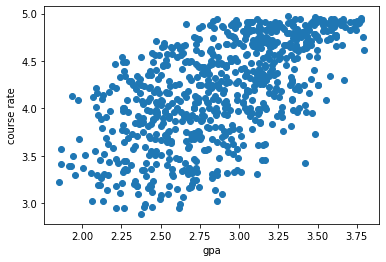

In [42]:
plt.scatter(df['gpa'], df['courserate']) # replace 'Col_1' and 'Col_2' with the two variables you want to plot
# add x-axis label
plt.xlabel("gpa")
# add y-axis label
plt.ylabel("course rate")
plt.show()